In [141]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pyplot
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import kstest
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import max_error

In [3]:
import easygui as ey
df = ey.fileopenbox()
df


'D:\\fraud_oracle.csv'

In [64]:
df1 = pd.read_csv(df)

In [65]:
df1

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [66]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [67]:
#removing duplicates and unnecessary variables
df1.drop_duplicates()


,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [69]:
df1.iloc[:,16]

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [70]:
df1.iloc[:,16]

0            1
1            2
2            3
3            4
4            5
         ...  
15415    15416
15416    15417
15417    15418
15418    15419
15419    15420
Name: PolicyNumber, Length: 15420, dtype: int64

In [71]:
df1.iloc[:,17]

0        12
1        15
2         7
3         4
4         3
         ..
15415     5
15416    11
15417     4
15418     6
15419     3
Name: RepNumber, Length: 15420, dtype: int64

In [72]:
df1.drop(['PolicyNumber','RepNumber'],inplace=True,axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [73]:
#creating separate datasets for fraud and no fraud
fraud_data = df1[df1.FraudFound_P==1]
nofraud_data = df1[df1.FraudFound_P==0]


# of non-fraud claims
14497
# of fraud claims
923
total # of claims


[Text(0.5, 1.0, 'No Fraud vs Fraud totals')]

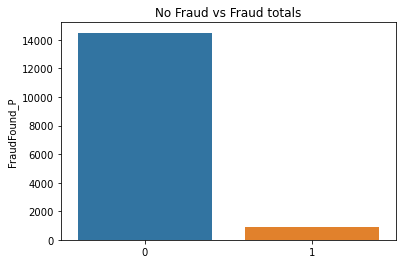

In [74]:
#checking my work
print('# of non-fraud claims')
print(len(nofraud_data))
print('# of fraud claims')
print(len(fraud_data))
print('total # of claims')
len(fraud_data+nofraud_data)
sns.barplot(x=df1['FraudFound_P'].value_counts().index,y=df1['FraudFound_P'].value_counts()).set(title='No Fraud vs Fraud totals')

In [75]:
df2=['Month','WeekOfMonth','DayOfWeek','Make','AccidentArea','DayOfWeekClaimed','MonthClaimed','WeekOfMonthClaimed','Sex','MaritalStatus','Age','Fault','PolicyType','VehicleCategory','VehiclePrice','Deductible','DriverRating','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','PoliceReportFiled','WitnessPresent','AgentType','NumberOfSuppliments','AddressChange_Claim','NumberOfCars','Year','BasePolicy']


In [76]:
df1.corr()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,Deductible,DriverRating,Year
WeekOfMonth,1.000000,0.275400,-0.004810,-0.011861,-0.003993,-0.016817,-0.003906
WeekOfMonthClaimed,0.275400,1.000000,0.001859,-0.005761,0.005457,-0.000048,0.012175
Age,-0.004810,0.001859,1.000000,-0.029741,0.069420,0.001668,0.025197
FraudFound_P,-0.011861,-0.005761,-0.029741,1.000000,0.017348,0.007266,-0.024760
Deductible,-0.003993,0.005457,0.069420,0.017348,1.000000,0.003886,-0.001170
DriverRating,-0.016817,-0.000048,0.001668,0.007266,0.003886,1.000000,-0.013890
Year,-0.003906,0.012175,0.025197,-0.024760,-0.001170,-0.013890,1.000000


In [77]:
#transforming string to integer data
def transform(column):
    label=LabelEncoder().fit_transform(df1[column])
    df1.drop(column,axis=1,inplace=True)
    df1[column]=label
def multi_transform(list):
    cor=[]
    for x in list:
        if x not in cor:
            transform(x)
multi_transform(df2)

In [78]:
#calculating the correlation between each variable and fraud
def multi_corr(column):
    corr=[]
    for data in column:
        if data not in corr:
            c=df1['FraudFound_P'].corr(df1[data],method='pearson')
            print(data)
            print(round(c,4))
print('Correlation scores by variable:')
multi_corr(df2)

Correlation scores by variable:
Month
-0.0087
WeekOfMonth
-0.0119
DayOfWeek
-0.0175
Make
-0.0192
AccidentArea
-0.0335
DayOfWeekClaimed
-0.0021
MonthClaimed
-0.0102
WeekOfMonthClaimed
-0.0058
Sex
0.03
MaritalStatus
0.0006
Age
-0.0277
Fault
-0.1314
PolicyType
-0.0571
VehicleCategory
-0.0992
VehiclePrice
0.0615
Deductible
0.0253
DriverRating
0.0073
Days_Policy_Accident
0.0055
Days_Policy_Claim
-0.0154
PastNumberOfClaims
0.0234
AgeOfVehicle
-0.0222
AgeOfPolicyHolder
-0.032
PoliceReportFiled
-0.016
WitnessPresent
-0.0081
AgentType
-0.023
NumberOfSuppliments
0.0133
AddressChange_Claim
-0.0376
NumberOfCars
0.0091
Year
-0.0248
BasePolicy
-0.1571


In [79]:
#creating two different lists for highly-correlated variables and low-correlated variables
high_corr=['BasePolicy','VehicleCategory','Fault','VehiclePrice','PolicyType']
low_corr=['DayOfWeekClaimed','MaritalStatus','Month','WeekOfMonth','MonthClaimed','WeekOfMonthClaimed','VehicleCategory','DriverRating','Days_Policy_Accident','WitnessPresent','NumberOfSuppliments','NumberOfCars']

In [100]:
#creating a function to make comparative bar charts
def fit(column):
    fig,(ax1, ax2)=plt.pyplot.subplots(1,2,figsize=(25,55))
    fig.title('NoFraud vs Fraud viz')
    sns.barplot(x=nofraud_data[column].value_counts().index,y=nofraud_data[column].value_counts(),ax=ax1)
    sns.barplot(x=fraud_data[column].value_counts().index,y=fraud_data[column].value_counts(),ax=ax2)
    
#creating another function to run the above function on every variable at once
def transform(list):
    mv_list=[]
    for x in list:
        if x not in mv_list:
            get_viz(x)
            multi_ciz(high_corr)

In [104]:
#creating a balanced dataset
data=nofraud_data.sample(n=700,replace=True,random_state=42)
data1=pd.concat([data,fraud_data])
data1.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,Deductible,DriverRating,Year
count,1623.000000,1623.000000,1623.000000,1623.00000,1623.000000,1623.000000,1623.000000
mean,2.752311,2.667283,38.987061,0.56870,408.687616,2.462723,1994.827480
std,1.275886,1.244552,13.850192,0.49541,43.911023,1.112505,0.799851
min,1.000000,1.000000,0.000000,0.00000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,30.000000,0.00000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,37.000000,1.00000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,47.000000,1.00000,400.000000,3.000000,1995.000000
max,5.000000,5.000000,80.000000,1.00000,700.000000,4.000000,1996.000000


In [105]:
#transforming string to integer data again
def transform(column):
    label=LabelEncoder().fit_transform(data1[column])
    data1.drop(column,axis=1,inplace=True)
    data1[column]=label
def multi_transform(list):
    mt_list=[]
    for x in list:
        if x not in mt_list:
            transform(x)
multi_transform(df2)



In [106]:
#building the model
y=data1.FraudFound_P
x=data1[df2]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=15)
model = RandomForestRegressor(random_state=37)
model.fit(xtrain, ytrain)
predictions=model.predict(xtest)

#checking accuracy
print('MAE:',mean_absolute_error(ytest,predictions))
print('Max Error:',max_error(ytest,predictions))

MAE: 0.2966009852216749
Max Error: 0.98


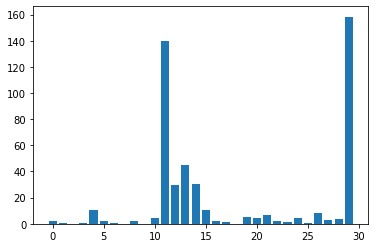

In [107]:
#checking correlation for feature selection
a=SelectKBest(score_func=f_regression, k='all')
a.fit(xtrain, ytrain)
xtrain_a=a.transform(xtrain)
xtest_a=a.transform(xtest)

#plotting correlation
pyplot.bar([i for i in range(len(a.scores_))],a.scores_)
pyplot.show()

In [167]:
#feature selection
def features(xtrain,train,xtest):
    a = SelectKBest(score_func=f_regression,k=4)
    a.fit(xtrain,ytrain)
    xtrain_a=a.transform(xtrain)
    xtest_a=a.transform(xtest)
    return xtrain_a,xtest_a,a
xtrain_a,xtest_a,a= features(xtrain,ytrain,xtest)

#fitting the model with feature selection
model=RandomForestRegressor(random_state=1)
model.fit(xtrain_a,ytrain)
model1=model.predict(xtest_a)

#checking accuracy
print('MAE:',mean_absolute_error(ytest,model1))
print('Max Error:',max_error(ytest,model1))

MAE: 0.34798670757243244
Max Error: 1.0


In [168]:
model=RandomForestRegressor(random_state=42,n_estimators=25,max_depth=5,min_samples_split=5,max_leaf_nodes=5,max_samples=500)
model.fit(xtrain,ytrain)
model2=model.predict(xtest)

In [169]:
#checking accuracy
print('MAE:',mean_absolute_error(ytest,model2))
print('Max Error:',max_error(ytest,model2))

MAE: 0.3181010228512338
Max Error: 0.9599221007750419


In [140]:
model=RandomForestRegressor(random_state=42,n_estimators=5,max_depth=30,min_samples_split=30,max_leaf_nodes=40,max_samples=2)
model.fit(xtrain_a,ytrain)
model3=model.predict(xtest_a)

print('MAE:',mean_absolute_error(ytest,model3))
print('Max Error:',max_error(ytest,model3))

MAE: 0.5
Max Error: 0.5


In [230]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=20,criterion = 'entropy')
model.fit(xtrain_a,ytrain)
model3=model.predict(xtest_a)

In [231]:
print('MAE:',mean_absolute_error(ytest,model3))
print('Max Error:',max_error(ytest,model3))

MAE: 0.2413793103448276
Max Error: 1


In [199]:
xtrain

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
6109,11,0,2,7,1,0,11,3,1,2,...,3,3,0,0,0,2,3,2,0,1
6942,9,1,4,7,1,0,9,1,1,1,...,4,6,0,0,0,0,3,0,1,2
3724,8,2,1,2,1,5,8,3,1,2,...,4,4,0,0,0,3,3,0,0,0
14141,1,2,0,11,1,0,1,3,1,1,...,6,7,0,0,0,1,3,0,2,0
13233,6,4,0,5,1,5,5,0,1,1,...,6,5,0,0,0,2,3,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,11,2,1,15,1,6,11,3,1,1,...,3,4,0,0,0,3,3,0,1,1
9292,4,2,2,11,1,6,4,2,1,2,...,5,5,0,0,0,3,3,0,1,0
2388,7,4,5,15,1,5,0,0,1,1,...,6,7,0,0,0,2,3,0,0,0
12236,8,2,1,11,1,5,8,3,1,1,...,4,4,0,0,0,2,3,0,2,0


In [202]:
ytrain

6109     1
6942     0
3724     1
14141    1
13233    1
        ..
6525     1
9292     1
2388     1
12236    1
6398     1
Name: FraudFound_P, Length: 1217, dtype: int64

In [200]:
xtest

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
13482,9,1,5,3,1,5,9,1,0,1,...,4,4,0,0,0,2,2,1,2,1
12116,7,1,1,5,1,5,7,2,0,1,...,5,4,0,0,0,2,3,0,2,2
2103,7,2,4,5,1,4,7,2,1,2,...,7,0,0,0,0,3,3,0,0,1
8313,9,1,3,11,1,1,9,2,1,1,...,4,4,0,0,0,3,1,0,1,0
12200,8,1,2,2,1,5,8,2,1,1,...,6,6,0,0,0,3,3,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10306,6,4,6,5,0,5,4,3,1,2,...,7,0,0,0,0,3,3,0,1,0
7583,10,4,3,15,1,6,9,0,0,2,...,2,4,0,0,0,2,3,0,1,2
4961,6,1,0,11,1,6,6,2,1,2,...,5,4,0,0,0,0,3,2,0,2
205,0,3,2,11,1,5,8,0,1,1,...,6,7,0,0,0,3,3,2,0,1


In [201]:
ytest

13482    0
12116    0
2103     1
8313     1
12200    0
        ..
10306    0
7583     1
4961     0
205      0
15300    1
Name: FraudFound_P, Length: 406, dtype: int64

In [206]:
from sklearn.preprocessing import StandardScaler  
std_scaler = StandardScaler()  
scaler = std_scaler.fit(xtrain)

In [209]:
scaler

StandardScaler()

In [210]:
scaler2 = scaler.fit_transform(xtest)


In [211]:
scaler2

array([[ 1.01392273, -0.60595275,  1.10741639, ...,  2.07246635,
         1.49650761,  0.31116731],
       [ 0.42752297, -0.60595275, -0.88642421, ..., -0.28445617,
         1.49650761,  1.71487761],
       [ 0.42752297,  0.16045478,  0.60895624, ..., -0.28445617,
        -0.99869605,  0.31116731],
       ...,
       [ 0.1343231 , -0.60595275, -1.38488436, ...,  4.42938887,
        -0.99869605,  1.71487761],
       [-1.62487616,  0.9268623 , -0.38796406, ...,  4.42938887,
        -0.99869605,  0.31116731],
       [ 0.1343231 , -0.60595275, -0.88642421, ..., -0.28445617,
         1.49650761, -1.09254299]])

In [220]:
from sklearn.linear_model import LinearRegression
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(xtrain, ytrain)
print(regr.score(xtest, ytest))

print('MAE:',mean_absolute_error(ytest,model2))
print('Max Error:',max_error(ytest,model2))

0.2885215916066918
MAE: 0.48815023284509684
Max Error: 0.9959318036265308


In [221]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25)
regr = LinearRegression()
regr.fit(xtrain, ytrain)
print(regr.score(xtest, ytest))

print('MAE:',mean_absolute_error(ytest,model3))
print('Max Error:',max_error(ytest,model3))

0.31870915435205727
MAE: 0.45566502463054187
Max Error: 1


In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
from sklearn import metrics
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state=42)
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

C:\Users\Meryl solomon.j\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [226]:
print('MAE:',mean_absolute_error(ytest,model2))
print('Max Error:',max_error(ytest,model2))

MAE: 0.3181010228512338
Max Error: 0.9599221007750419


In [227]:
print('MAE:',mean_absolute_error(ytest,model3))
print('Max Error:',max_error(ytest,model3))

MAE: 0.23891625615763548
Max Error: 1
